## Logistic Regression Algorithm

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read dataset

df = pd.read_csv(r"C:\Users\Roshan B\Desktop\ML\Dataset\titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# check rows and columns
df.shape

(891, 12)

In [5]:
# checking info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

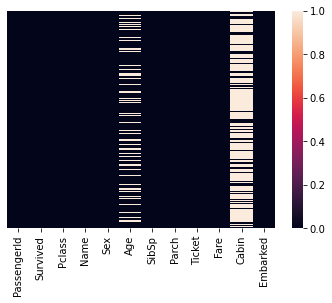

In [7]:
# visualize the null values
sns.heatmap(df.isnull(),yticklabels=False)

In [8]:
# Checking balancing of column 'Survived'

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

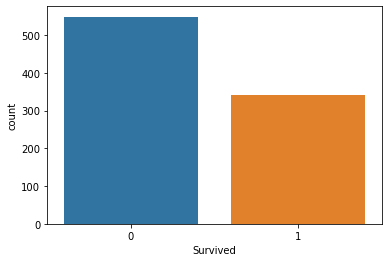

In [9]:
sns.countplot(x = 'Survived',data = df)

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df['Survived'].value_counts()[0]

549

In [12]:
df['Survived'].value_counts()[1]

342

In [13]:
total_counts = df['Survived'].value_counts()[0] + df['Survived'].value_counts()[1]

In [14]:
total_counts

891

In [15]:
# to find percentage

zero = (df['Survived'].value_counts()[0])/(df['Survived'].value_counts()[0] + df['Survived'].value_counts()[1])*100

In [16]:
zero

61.61616161616161

In [17]:
one = (df['Survived'].value_counts()[1])/(df['Survived'].value_counts()[0] + df['Survived'].value_counts()[1])*100

In [18]:
one

38.38383838383838

<AxesSubplot:xlabel='Survived', ylabel='count'>

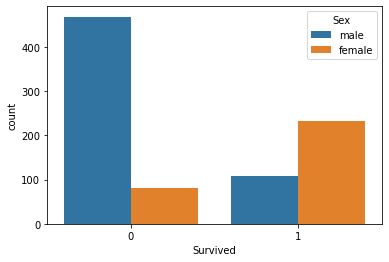

In [19]:
# to check male or female which one is more Survived.

# 0--> means dead
# 1--> means save(jaan bach gayi...)

sns.countplot(x='Survived',data = df,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

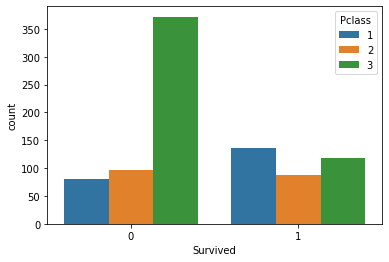

In [20]:
# check which class more survied

sns.countplot(x='Survived',data = df, hue='Pclass')

in 0 (death)----> 3rd class has more deaths
                  2nd class less than 3rd deaths
                  1st class again less than 3rd and 2nd

In [21]:
# check distrubution of age column,but age column has null values,so first drop null values

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

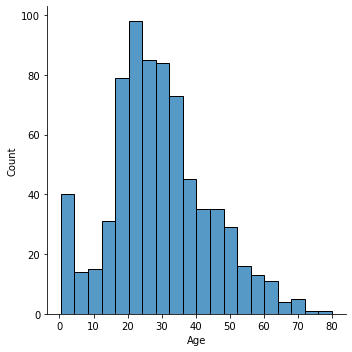

In [23]:
sns.displot(df['Age'].dropna())

<AxesSubplot:xlabel='SibSp', ylabel='count'>

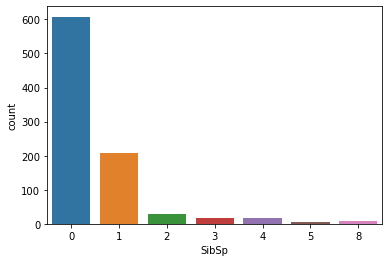

In [24]:
sns.countplot(x='SibSp',data = df)

<AxesSubplot:>

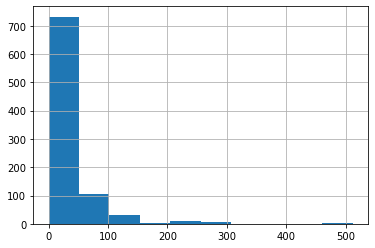

In [25]:
df['Fare'].hist()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

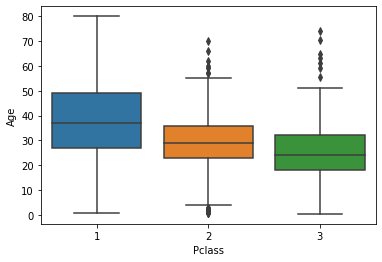

In [26]:
sns.boxplot(x= 'Pclass',y='Age',data = df)

<AxesSubplot:>

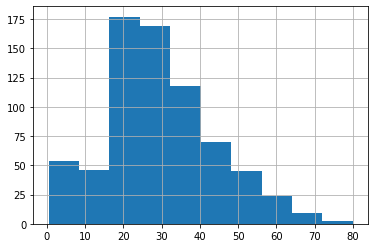

In [27]:
df['Age'].hist()

In [28]:
df[df['Pclass']==1]['Age'].median()

37.0

In [29]:
df[df['Pclass']==2]['Age'].median()

29.0

In [30]:
df[df['Pclass']==3]['Age'].median()

24.0

In [31]:
# create impute function, to impute median values where null values is present.

def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [32]:
# apply function is used

df['New_Age'] = df[['Age','Pclass']].apply(impute,axis=1)

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,24.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
New_Age          0
dtype: int64

In [35]:
# drop column Name

df.drop('Name',axis=1,inplace=True)

In [36]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,24.0
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,26.0


In [37]:
# drop column Cabin

df.drop('Cabin',axis=1,inplace=True)

In [38]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Age
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,35.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S,27.0
887,888,1,1,female,19.0,0,0,112053,30.0000,S,19.0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,24.0
889,890,1,1,male,26.0,0,0,111369,30.0000,C,26.0


In [39]:
# drop column Ticket

df.drop('Ticket',axis=1,inplace=True)

In [40]:
# drop column Age

df.drop('Age',axis=1,inplace=True)

In [41]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,New_Age
0,1,0,3,male,1,0,7.2500,S,22.0
1,2,1,1,female,1,0,71.2833,C,38.0
2,3,1,3,female,0,0,7.9250,S,26.0
3,4,1,1,female,1,0,53.1000,S,35.0
4,5,0,3,male,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,27.0
887,888,1,1,female,0,0,30.0000,S,19.0
888,889,0,3,female,1,2,23.4500,S,24.0
889,890,1,1,male,0,0,30.0000,C,26.0


In [42]:
# encoding by get_dummies method
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [43]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [44]:
# encoding by get_dummies method
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [45]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [46]:
# add columns Sex,embarked in df dataset

final_df = pd.concat([df,sex,embarked],axis=1)

In [47]:
final_df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,New_Age,male,Q,S
0,1,0,3,male,1,0,7.2500,S,22.0,1,0,1
1,2,1,1,female,1,0,71.2833,C,38.0,0,0,0
2,3,1,3,female,0,0,7.9250,S,26.0,0,0,1
3,4,1,1,female,1,0,53.1000,S,35.0,0,0,1
4,5,0,3,male,0,0,8.0500,S,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,27.0,1,0,1
887,888,1,1,female,0,0,30.0000,S,19.0,0,0,1
888,889,0,3,female,1,2,23.4500,S,24.0,0,0,1
889,890,1,1,male,0,0,30.0000,C,26.0,1,0,0


In [48]:
# drop column Sex,embarked

final_df.drop(columns=['Sex','Embarked'],inplace= True)

In [49]:
final_df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
0,1,0,3,1,0,7.2500,22.0,1,0,1
1,2,1,1,1,0,71.2833,38.0,0,0,0
2,3,1,3,0,0,7.9250,26.0,0,0,1
3,4,1,1,1,0,53.1000,35.0,0,0,1
4,5,0,3,0,0,8.0500,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,27.0,1,0,1
887,888,1,1,0,0,30.0000,19.0,0,0,1
888,889,0,3,1,2,23.4500,24.0,0,0,1
889,890,1,1,0,0,30.0000,26.0,1,0,0


In [50]:
X = final_df.drop('Survived',axis=1)

In [51]:
X

,PassengerId,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
0,1,3,1,0,7.2500,22.0,1,0,1
1,2,1,1,0,71.2833,38.0,0,0,0
2,3,3,0,0,7.9250,26.0,0,0,1
3,4,1,1,0,53.1000,35.0,0,0,1
4,5,3,0,0,8.0500,35.0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,13.0000,27.0,1,0,1
887,888,1,0,0,30.0000,19.0,0,0,1
888,889,3,1,2,23.4500,24.0,0,0,1
889,890,1,0,0,30.0000,26.0,1,0,0


In [52]:
y = final_df['Survived']

In [53]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=45)

In [56]:
X_train

,PassengerId,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
650,651,3,0,0,7.8958,24.0,1,0,1
784,785,3,0,0,7.0500,25.0,1,0,1
125,126,3,1,0,11.2417,12.0,1,0,0
54,55,1,0,1,61.9792,65.0,1,0,0
446,447,2,0,1,19.5000,13.0,0,0,1
...,...,...,...,...,...,...,...,...,...
725,726,3,0,0,8.6625,20.0,1,0,1
607,608,1,0,0,30.5000,27.0,1,0,1
544,545,1,1,0,106.4250,50.0,1,0,0
643,644,3,0,0,56.4958,24.0,1,0,1


In [57]:
X_test

,PassengerId,Pclass,SibSp,Parch,Fare,New_Age,male,Q,S
248,249,1,1,1,52.5542,37.0,1,0,1
197,198,3,0,1,8.4042,42.0,1,0,1
133,134,2,1,0,26.0000,29.0,0,0,1
169,170,3,0,0,56.4958,28.0,1,0,1
736,737,3,1,3,34.3750,48.0,0,0,1
...,...,...,...,...,...,...,...,...,...
422,423,3,0,0,7.8750,29.0,1,0,1
815,816,1,0,0,0.0000,37.0,1,0,1
466,467,2,0,0,0.0000,29.0,1,0,1
559,560,3,1,0,17.4000,36.0,0,0,1


In [58]:
y_train

650    0
784    0
125    1
54     0
446    1
      ..
725    0
607    1
544    0
643    1
414    1
Name: Survived, Length: 623, dtype: int64

In [59]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

In [61]:
# now implement logistic Regression

from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
model.fit(X_train,y_train)

C:\Users\Roshan B\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_predict = model.predict(X_test)

In [67]:
y_predict

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [68]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

In [69]:
# Now Check Accuracy score

from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268



In [74]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_predict)

In [75]:
conf_matrix

array([[152,  26],
       [ 21,  69]], dtype=int64)

In [77]:
(152+69)/(152+26+21+69)

0.8246268656716418